In [2]:
from cobra import Reaction, Metabolite
from cobra.io import read_sbml_model
model_LB_vio_fad=read_sbml_model('Models/model_VN_LB_vio-fad.xml')

In [3]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [4]:
from cobra.util.solver import linear_reaction_coefficients
linear_reaction_coefficients(model_LB_vio_fad)

{<Reaction Growth at 0x1dec27e5cd0>: 1.0}

Analysis of Ex_glc in LB media with FAD as a cofactor

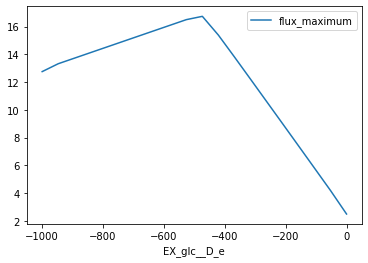

In [14]:
with model_LB_vio_fad:
    model_LB_vio_fad.reactions.EX_glc__D_e.bounds = -1000, 1000
    ppp_succ_LB = production_envelope(model_LB_vio_fad,
                    reactions=[model_LB_vio_fad.reactions.EX_glc__D_e],
                    objective=model_LB_vio_fad.reactions.Growth)
    ppp_succ_LB.plot(x='EX_glc__D_e', y='flux_maximum')

Optimal O2 uptake rate in LB media with FAD as a cofactor

-578.9473684210527


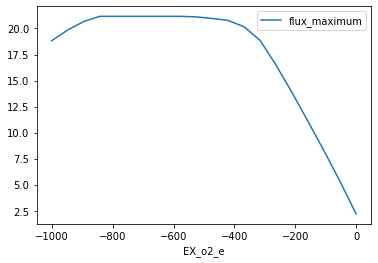

In [8]:
with model_LB_vio_fad:
    model_LB_vio_fad.reactions.EX_o2_e.bounds = -1000, 1000
    ppp_o2_LB = production_envelope(model_LB_vio_fad,
                    reactions=[model_LB_vio_fad.reactions.EX_o2_e],
                    objective=model_LB_vio_fad.reactions.Growth)
    print(ppp_o2_LB.EX_o2_e[ppp_o2_LB.flux_maximum.idxmax()])
    ppp_o2_LB.plot(x='EX_o2_e', y='flux_maximum')

-578.9473684210527


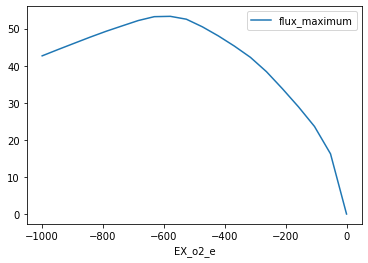

In [9]:
with model_LB_vio_fad:
    model_LB_vio_fad.reactions.EX_o2_e.bounds = -1000, 1000
    ppp_o2_LB = production_envelope(model_LB_vio_fad,
                    reactions=[model_LB_vio_fad.reactions.EX_o2_e],
                    objective=model_LB_vio_fad.reactions.Violacein)
    print(ppp_o2_LB.EX_o2_e[ppp_o2_LB.flux_maximum.idxmax()])
    ppp_o2_LB.plot(x='EX_o2_e', y='flux_maximum')

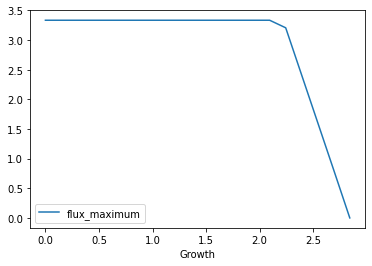

In [12]:
with model_LB_vio_fad:
    ppp_Growth_LB = production_envelope(model_LB_vio_fad,
                    reactions=[model_LB_vio_fad.reactions.Growth],
                    objective=model_LB_vio_fad.reactions.Violacein)
    ppp_Growth_LB.plot(x='Growth', y='flux_maximum')

In [61]:
#ppp_o2_LB.EX_o2_e[ppp_o2_LB.flux_maximum.idxmax()]

In [62]:
#ppp_o2_LB.plot(x='EX_o2_e', y='flux_maximum')

Analysis of Ex_glc in M9 media with FAD as a cofactor

In [16]:
model_M9_vio_fad=read_sbml_model('Models/model_VN_M9_vio-fad.xml')

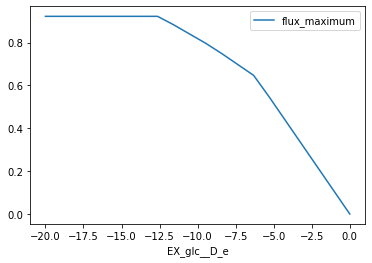

In [25]:
with model_M9_vio_fad:
    model_M9_vio_fad.reactions.EX_glc__D_e.bounds = -20, 1000
    ppp_succ_M9 = production_envelope(model_M9_vio_fad,
                    reactions=[model_M9_vio_fad.reactions.EX_glc__D_e],
                    objective=model_M9_vio_fad.reactions.Growth)
    ppp_succ_M9.plot(x='EX_glc__D_e', y='flux_maximum')

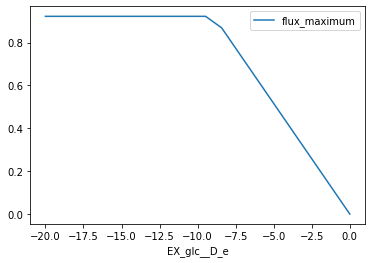

In [26]:
with model_M9_vio_fad:
    model_M9_vio_fad.reactions.EX_glc__D_e.bounds = -20, 1000
    model_M9_vio_fad.reactions.EX_o2_e.bounds = -1000, 1000
    ppp_succ_M9 = production_envelope(model_M9_vio_fad,
                    reactions=[model_M9_vio_fad.reactions.EX_glc__D_e],
                    objective=model_M9_vio_fad.reactions.Growth)
    ppp_succ_M9.plot(x='EX_glc__D_e', y='flux_maximum')

Optimal O2 uptake rate in M9 media with FAD as a cofactor

-13.157894736842152


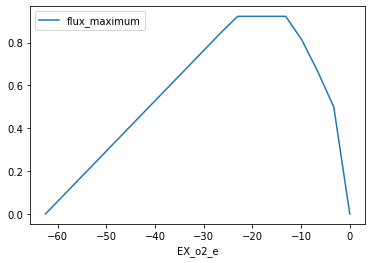

In [18]:
with model_M9_vio_fad:
    model_M9_vio_fad.reactions.EX_o2_e.bounds = -1000, 1000
    ppp_o2_M9 = production_envelope(model_M9_vio_fad,
                    reactions=[model_M9_vio_fad.reactions.EX_o2_e],
                    objective=model_M9_vio_fad.reactions.Growth)
    print(ppp_o2_M9.EX_o2_e[ppp_o2_M9.flux_maximum.idxmax()])
    ppp_o2_M9.plot(x='EX_o2_e', y='flux_maximum')

In [68]:
#ppp_o2_M9.EX_o2_e[ppp_o2_M9.flux_maximum.idxmax()]

In [69]:
#ppp_o2_LB.plot(x='EX_o2_e', y='flux_maximum')